### Ensamble Technique : Random Forest

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

Read Dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [6]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

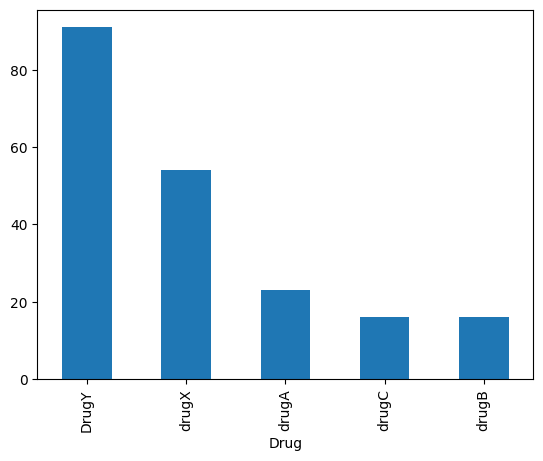

In [7]:
df['Drug'].value_counts().plot(kind='bar')

Check missing values into the dataset

In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Separate X and Y values

In [9]:
x = df.drop(labels=['Drug'],axis=1)
y = df[['Drug']]

In [10]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


Apply Label Encoding to y values

In [12]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Drug']=le.fit_transform(y['Drug'])
y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [13]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [14]:
y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

Preprocrssing of x feature

In [15]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [16]:
cat

['Sex', 'BP', 'Cholesterol']

In [17]:
con

['Age', 'Na_to_K']

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])


cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])



pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [20]:
x_pre=pre.fit_transform(x)
x_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [21]:
cols=pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [22]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Train test Split

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.3,random_state=67)

In [24]:
xtrain.shape

(140, 9)

In [25]:
xtest.shape

(60, 9)

In [26]:
ytrain.value_counts()

Drug 
DrugY    62
drugX    36
drugA    21
drugB    11
drugC    10
Name: count, dtype: int64

In [27]:
ytest.value_counts()

Drug 
DrugY    29
drugX    18
drugC     6
drugB     5
drugA     2
Name: count, dtype: int64

#### Build model

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=21)
model.fit(xtrain,ytrain)


RandomForestClassifier(random_state=21)

In [29]:
## model training  accuracy
model.score(xtrain,ytrain)

1.0

In [30]:
## testing accuracy
model.score(xtest,ytest)

0.9833333333333333

#### Hyperparameter Tunning

In [31]:
params = {'n_estimators':[10,50,100,200],
          'max_depth':[2,3,4,5,6,7,8],
          'min_samples_split':[4,5,6,7,8],
          'criterion':['gini','entropy']}

In [32]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
gscv =GridSearchCV(rfc,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [33]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [34]:
gscv.best_score_

0.9957333333333335

In [35]:
best_rfc = gscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=50,
                       random_state=21)

#### Evaluating The Model

In [36]:
## training accuracy
best_rfc.score(xtrain,ytrain)

1.0

In [37]:
## testing accuracy
best_rfc.score(xtest,ytest)

0.9833333333333333

#### Predicting The values

In [38]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [39]:
ypred_tr[0:5]

array(['DrugY', 'drugX', 'drugA', 'drugX', 'drugC'], dtype=object)

In [40]:
ytrain.head()

,Drug
122,DrugY
72,drugX
76,drugA
112,drugX
196,drugC


In [41]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA'], dtype=object)

In [42]:
ytest.head()

,Drug
32,drugX
77,DrugY
71,DrugY
166,DrugY
187,drugA


Getting original Labels

In [43]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

ValueError: y contains previously unseen labels: ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']

In [ ]:
ypred_tr_lb

NameError: name 'ypred_tr_lb' is not defined

In [ ]:
ypred_ts_lb

NameError: name 'ypred_ts_lb' is not defined

#### Confusion Matrix testing

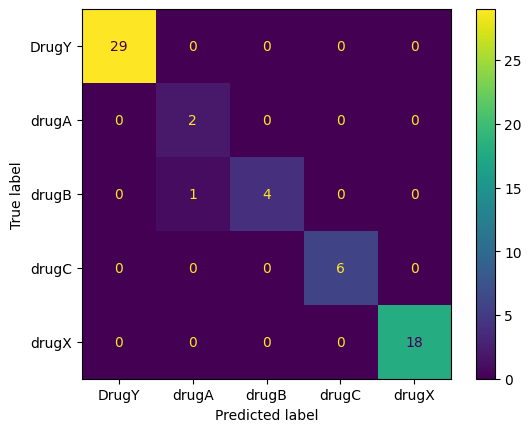

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_rfc.classes_)
cfd.plot()

Check classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        29
       drugA       0.67      1.00      0.80         2
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.99      0.98      0.98        60



Predicting Data for new patients

In [55]:
def predict_data(pre,model,le,file_path):

    ## Read the dataset
    xnew = pd.read_csv(file_path)

    ## Preprocessesing
    xnew_pre =pre.transform(xnew)
    xnew_pre = pd.DataFrame(xnew_pre,columns= pre.get_feature_names_out())

    ## Predicting
    pred = model.predict(xnew_pre)

    ## Get the acual labels
    pred_lb = le.inverse_transform(pred)

    ## Storing values in dataframe
    xnew['Drug_pred']=pred_lb

    ## Display the dataframe
    display(xnew)

    xnew.to_csv('predictions.csv',index = False)

    return xnew



In [57]:
file_path = 'New_patients.csv'
predict_data(pre,best_rfc,le,file_path)

KeyError: "['Na_to_K'] not in index"

In [58]:
xsamples=df.sample(10)

In [52]:
xsamples

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
66,29,M,HIGH,HIGH,12.856,1
107,42,M,LOW,HIGH,20.013,0
153,72,F,LOW,NORMAL,14.642,4
5,22,F,NORMAL,HIGH,8.607,4
86,51,F,NORMAL,HIGH,13.597,4
199,40,F,LOW,NORMAL,11.349,4
128,47,M,LOW,NORMAL,33.542,0
37,39,M,LOW,NORMAL,13.938,4
178,39,M,NORMAL,HIGH,15.969,0
104,22,M,HIGH,NORMAL,28.294,0


In [59]:
xsamples.to_csv('patients2.csv',index=False)

In [60]:
file_path = 'patients2.csv'
predict_data(pre,best_rfc,le,file_path)

ValueError: y contains previously unseen labels: ['DrugY' 'drugB' 'drugX']